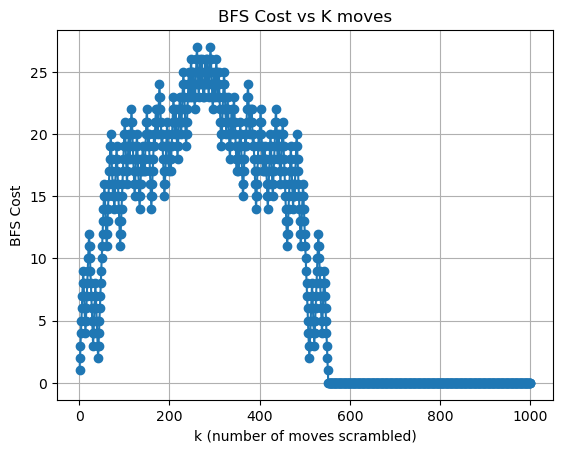

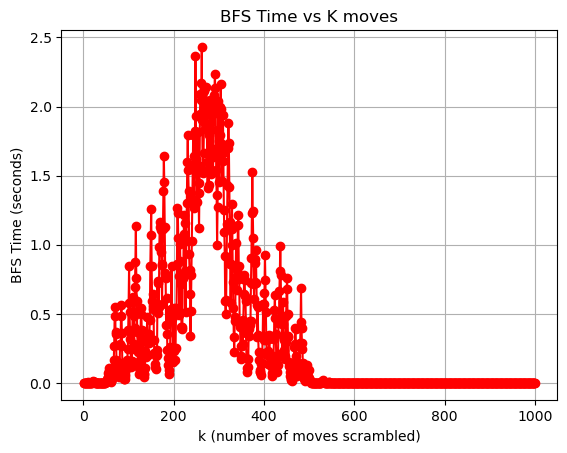

In [26]:
import sys
from collections import deque
import matplotlib.pyplot as plt
import time

# Global space to store the 3x3 board
space = []

def print_Arr(arr):
    strr = ""
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            strr += arr[i][j]
    print(strr)
    return

def check_move(x, y, direction):
    if direction == "LEFT":
        if not (x < 0 or y-1 < 0 or x > 2 or y > 2):
            return (x, y-1)
        return "invalid move"
    if direction == "RIGHT":
        if not (x < 0 or y < 0 or x > 2 or y+1 > 2):
            return (x, y+1)
        return "invalid move"
    if direction == "UP":
        if not (x-1 < 0 or y < 0 or x > 2 or y > 2):
            return (x-1, y)
        return "invalid move"
    if direction == "DOWN":
        if not (x < 0 or y < 0 or x+1 > 2 or y > 2):
            return (x+1, y)
        return "invalid move"

def hash_place(space):
    # Find position of '#' (blank tile) in the board
    item = "#"
    for i in range(len(space)):
        if item in space[i]:
            return (i, space[i].index(item))

def move_take(inputt):
    # Validate input length and convert string to 2D board
    if len(inputt) != 9:
        return "Input is too long or too short"
    global space
    space.clear()
    count = 0
    for i in range(3):
        inner = []
        for j in range(3):
            inner.append(inputt[count])
            count += 1
        space.append(inner)
    return

def make_move(blank, move):
    # Perform move by swapping blank tile with target position
    if isinstance(move, str):
        return None
    x1, y1 = blank
    x2, y2 = move
    temp = space[x1][y1]
    space[x1][y1] = space[x2][y2]
    space[x2][y2] = temp
    return board_to_string(space)

def board_to_string(board):
    string = ""
    for i in board: 
        string = string + ''.join(i)
    return string
    
def board_str_to_space(board_str):
    # Convert string to 2D board and update global space
    global space  #tells we are using the global defn 
    space.clear()# clear its contents
    #space declariton is a strign
    count = 0 
    for i in range(3):
        row = []
        for j in range(3):
            row.append(board_str[count])
            count += 1
        space.append(row)
    return space



def run(state_str, direction):
    # Attempt a move on given state and return new state string or None if invalid
    global space
    board_str_to_space(state_str) #convertt the boards string into the space 
    blank = hash_place(space) #find the hash
    move_pos = check_move(blank[0], blank[1], direction) #check if we can move hash in the stipulated direction

    if isinstance(move_pos, str) and "invalid" in move_pos:
        return None

    make_move(blank, move_pos) #otehrwise continue and actually make the move in the stipulated direction
    new_state = board_to_string(space) #the borad is upadtes so lets see what it looks like as a string?
    return new_state 

def bfs_shortest_path(initial_state, goal_state):
    # Perform BFS to find shortest path cost from initial to goal state
    visited = set() #part of our huertsic will decrease our time andd space complexity
    queue = deque([(initial_state, 0)])  # (state, cost)
    visited.add(initial_state)
    moves = ["LEFT", "UP", "DOWN", "RIGHT"]

    while queue:
        current_state, cost = queue.popleft() #pop the first item in the queue everything in queue is stored as a state 
                                                #and a int value
                                                #Last cost it pops will be the cost of reaching the goal node
        
        # Check if goal state is reached
        if current_state == goal_state:
            return cost

        # Try all possible moves
        for move in moves:
            new_state = run(current_state, move) #create a new state based on what will result if we run in that dire so that siccesor
            if new_state and new_state not in visited: #if its not none and is not in visted then 
                visited.add(new_state)
                queue.append((new_state, cost + 1)) #state is 1 increasing 

    return -1  # No path found

def k_boardmoves(n, blank_slider):
    curr_state_str = "12345678#"        # Start with solved board as a string
    uniq_states = []                   # Store unique states
    moves = ["LEFT", "UP", "DOWN", "RIGHT"]
    
    # Convert initial state string to 2D array
    board_str_to_space(curr_state_str)
    curr_state = [row[:] for row in space]  # Make a copy of the global space
    
    for i in range(n):
        blankk = hash_place(curr_state)     # Find the blank position
        found_new_state = False
        
        for j in range(4):
            move = check_move(blankk[0], blankk[1], moves[j])
            
            if isinstance(move, str):       # Invalid move
                continue
            
            # Make a deep copy of current board before modifying
            temp_state = [row[:] for row in curr_state]
            make_move(blankk, move)
            new_state_str = board_to_string(space)
            
            # Restore the original board for next direction test
            space.clear()
            for r in temp_state:
                space.append(r[:])
            
            if new_state_str not in uniq_states:
                uniq_states.append(new_state_str)
                board_str_to_space(new_state_str)
                curr_state = [row[:] for row in space]
                found_new_state = True
                break   # Stop after first valid unique move
        
        if not found_new_state:
            break   # Stop if no new unique states can be generated
    
    return uniq_states

    


initial_state = "12345678#"

blank_slider = hash_place(initial_state)
uniq_states =[]
# Validate input
# Run BFS and output result
k_values = []
results_costs = []
results_times = [] 

   # starting k
for k in range(1, 1001):
    l = k_boardmoves(k, blank_slider)
    if len(l) <= 1:
        goal_state = l[0]
    goal_state = l[-1]

    if len(initial_state) != 9 or len(goal_state) != 9:
        print("Invalid input length")
        sys.exit()

    # Measure time for BFS
    start_time = time.time()  # record start
    result = bfs_shortest_path(initial_state, goal_state)
    end_time = time.time()    # record end

    elapsed_time = end_time - start_time  # compute elapsed wall-clock time

    k_values.append(k)
    results_costs.append(result)
    results_times.append(elapsed_time)

    # Optional: stop at first 50 k-values
    if len(k_values) >= 1000:
        break

    
# Create the plot
# Plot BFS cost vs k
plt.figure()
plt.plot(k_values, results_costs, marker='o', linestyle='-')
plt.xlabel('k (number of moves scrambled)')
plt.ylabel('BFS Cost')
plt.title('BFS Cost vs K moves')
plt.grid(True)
plt.show()

# Plot BFS time vs k
plt.figure()
plt.plot(k_values, results_times, marker='o', linestyle='-', color='red')
plt.xlabel('k (number of moves scrambled)')
plt.ylabel('BFS Time (seconds)')
plt.title('BFS Time vs K moves')
plt.grid(True)
plt.show()